In [26]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hierar
from sklearn.decomposition import PCA
from pylab import rcParams
%matplotlib inline

In [8]:
# load data
f = open("Animals_with_Attributes/predicate-matrix-continuous.txt")
X = []
Y = range(1,50,1)
for line in f.readlines():
    X.append([float(x) for x in line.split()])

In [14]:
fn = open("Animals_with_Attributes/classes.txt")
names = []
for line in fn.readlines():
    names.append(line.strip().split('\t',1)[1])

In [15]:
print names

['antelope', 'grizzly+bear', 'killer+whale', 'beaver', 'dalmatian', 'persian+cat', 'horse', 'german+shepherd', 'blue+whale', 'siamese+cat', 'skunk', 'mole', 'tiger', 'hippopotamus', 'leopard', 'moose', 'spider+monkey', 'humpback+whale', 'elephant', 'gorilla', 'ox', 'fox', 'sheep', 'seal', 'chimpanzee', 'hamster', 'squirrel', 'rhinoceros', 'rabbit', 'bat', 'giraffe', 'wolf', 'chihuahua', 'rat', 'weasel', 'otter', 'buffalo', 'zebra', 'giant+panda', 'deer', 'bobcat', 'pig', 'lion', 'mouse', 'polar+bear', 'collie', 'walrus', 'raccoon', 'cow', 'dolphin']


In [16]:
# k-means
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
pred = kmeans.predict(X)
kmeans_dict = {}
for i in range(len(X)):
    if not kmeans_dict.has_key(pred[i]):
        kmeans_dict[pred[i]] = []
    kmeans_dict[pred[i]].append(names[i])

In [17]:
print kmeans_dict

{0: ['beaver', 'skunk', 'mole', 'hamster', 'squirrel', 'rabbit', 'rat', 'mouse', 'raccoon'], 1: ['killer+whale', 'blue+whale', 'humpback+whale', 'seal', 'otter', 'walrus', 'dolphin'], 2: ['fox', 'wolf', 'weasel'], 3: ['antelope', 'horse', 'moose', 'giraffe', 'zebra', 'deer'], 4: ['hippopotamus', 'elephant', 'ox', 'sheep', 'rhinoceros', 'buffalo', 'giant+panda', 'pig', 'cow'], 5: ['dalmatian', 'persian+cat', 'german+shepherd', 'siamese+cat', 'chihuahua', 'collie'], 6: ['tiger', 'leopard', 'bobcat', 'lion'], 7: ['spider+monkey', 'gorilla', 'chimpanzee'], 8: ['bat'], 9: ['grizzly+bear', 'polar+bear']}


AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

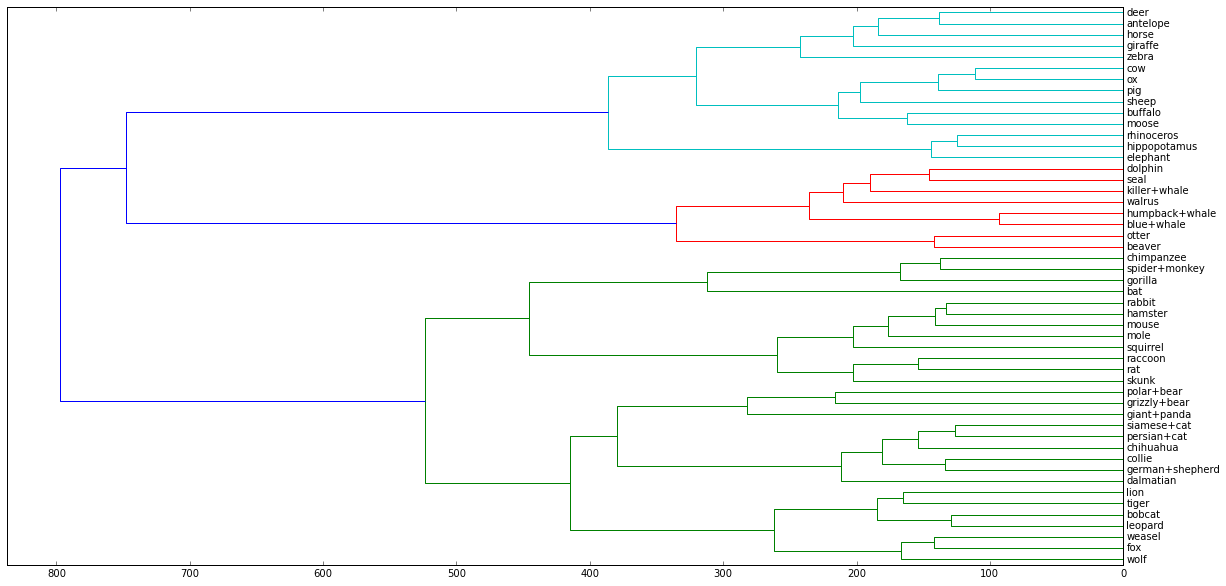

In [25]:
rcParams['figure.figsize'] = 20, 10
Z = hierar.linkage(X, method='ward')
d = hierar.dendrogram(Z, orientation='right', labels=names)

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

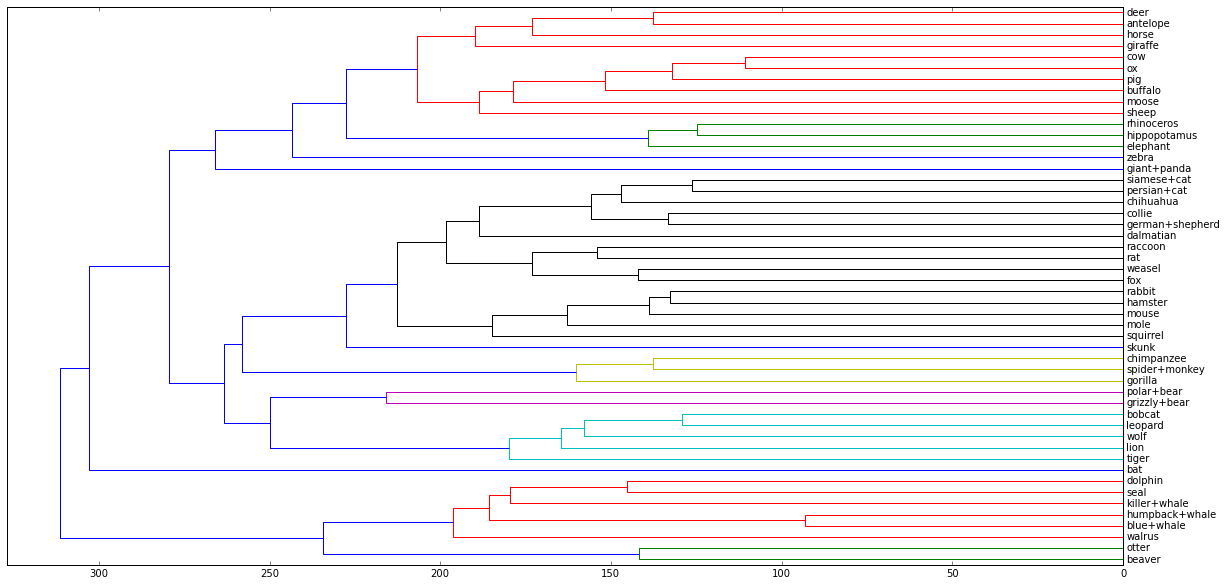

In [24]:
rcParams['figure.figsize'] = 20, 10
Z = hierar.linkage(X, method='average')
d = hierar.dendrogram(Z, orientation='right', labels=names)

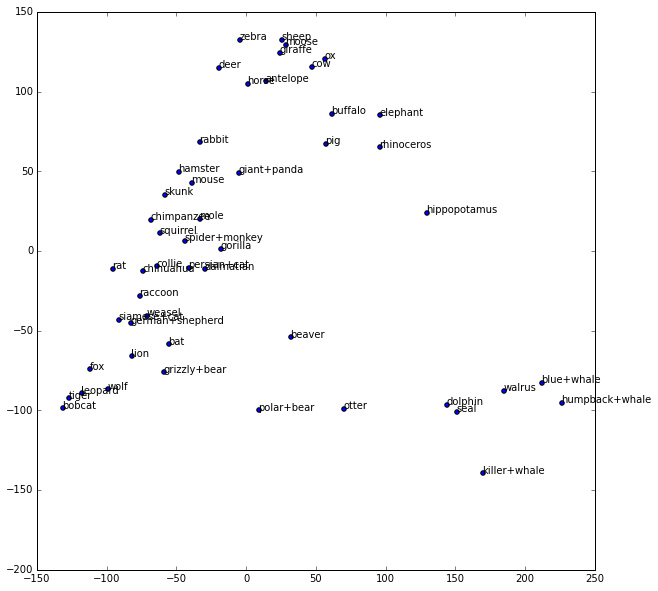

In [27]:
# PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
plt.figure(figsize=(10,10))
plt.scatter([x[0] for x in X_new], [x[1] for x in X_new])
for i in range(len(X_new)):
    plt.text(X_new[i][0], X_new[i][1], names[i])